# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each.

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values.

In [ ]:
# Your code here

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/boston_data - boston_data.csv')

In [ ]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0,0.413,5.961,17.5,5.2873,4,305,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0,0.453,5.927,47.2,6.9320,8,284,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0,0.544,5.972,76.7,3.1025,4,304,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0,0.871,5.597,94.9,1.5257,5,403,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0,0.439,6.115,63.0,6.8147,4,243,16.8,393.97,9.43,20.5


In [ ]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [ ]:
data.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    int64  
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    int64  
 9   tax      404 non-null    int64  
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 44.3 KB


In [ ]:
data.isnull().sum()
# no missing values

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [ ]:
# WHAT DO THE VARIABLES MEAN? I found a reference in google about what the variables may mean. Not sure about all of them but is the best I could find.

# crim: Per capita crime rate by town
# zn: Proportion of residential land zoned for large plots (over 25,000 sq. ft.)
# indus: Proportion of non-retail business acres per town
# chas: Whether the property is adjacent to the Charles River (binary: 1 if tract bounds river; 0 otherwise)
# nox: Nitric oxides concentration (parts per 10 million)
# rm: Average number of rooms per dwelling
# age: Proportion of owner-occupied units built before 1940
# dis: Weighted distances to five Boston employment centers
# rad: Index of accessibility to radial highways
# tax: Property tax rate (per $10,000)
# ptratio: Pupil-teacher ratio by town
# black: Percentage of residents of African American descent by town. Really???
# lstat: Percentage of lower status of the population
# medv: Median value of owner-occupied homes in $1000s (the target variable)

In [ ]:
data.fillna(data.mean(), inplace=True)

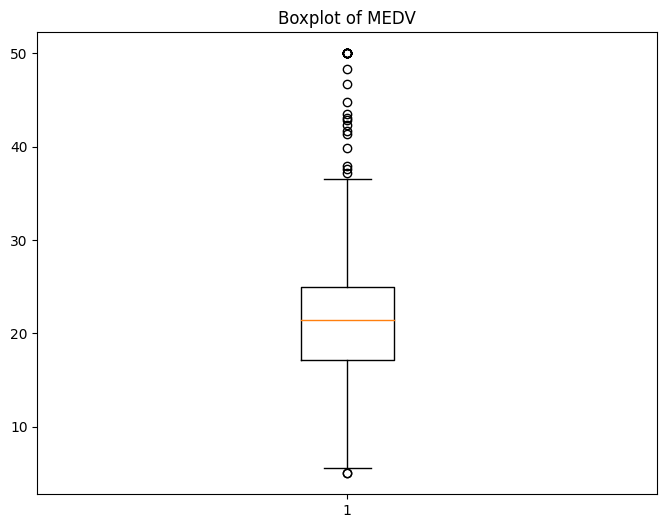

In [ ]:
# i found a question where they used this quick method to identify outliers when we are identifyin what data to clean (if any)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(data['medv'])
plt.title('Boxplot of MEDV')
plt.show()

In [ ]:
# z-score method
from scipy import stats

z_scores = stats.zscore(data['medv'])
threshold = 3
outliers = data[(z_scores > threshold) | (z_scores < -threshold)]

In [ ]:
# drop outliers
cleaned_data = data[(z_scores <= threshold) & (z_scores >= -threshold)]

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [ ]:
# Your plots here
import matplotlib.pyplot as plt
import seaborn as sns

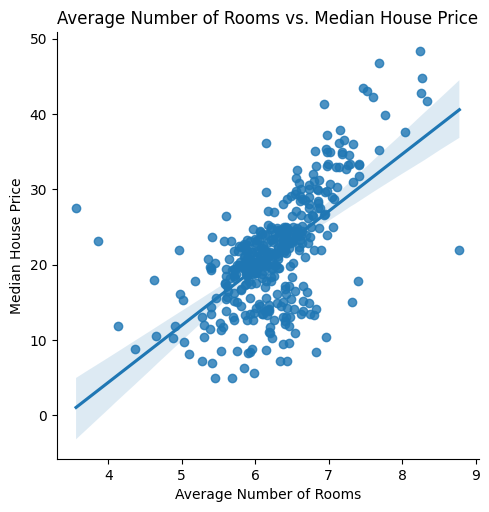

In [ ]:
#  'rm' against 'medv'
sns.lmplot(x='rm', y='medv', data=data)
plt.title('Average Number of Rooms vs. Median House Price')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Price')
plt.show()

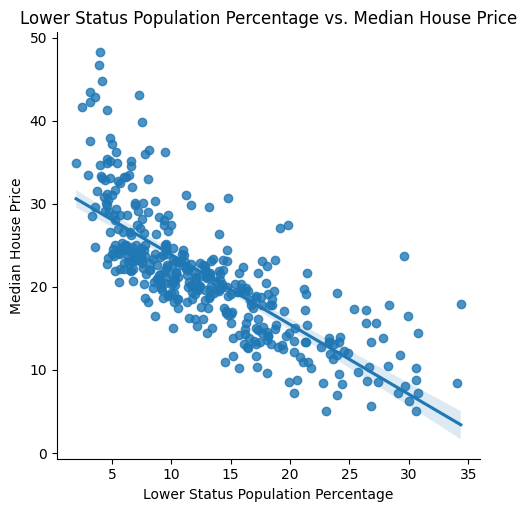

In [ ]:
# 'lstat' against 'medv'
sns.lmplot(x='lstat', y='medv', data=data)
plt.title('Lower Status Population Percentage vs. Median House Price')
plt.xlabel('Lower Status Population Percentage')
plt.ylabel('Median House Price')
plt.show()

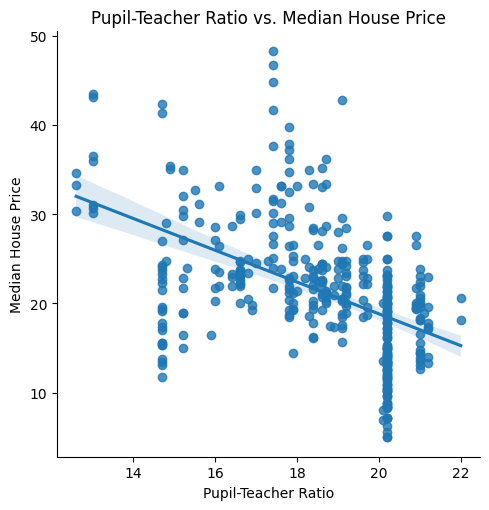

In [ ]:
# 'ptratio' against 'medv'
sns.lmplot(x='ptratio', y='medv', data=data)
plt.title('Pupil-Teacher Ratio vs. Median House Price')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Median House Price')
plt.show()


### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Your response here
# 1. rm Vs medv: avg number of rooms vs median house price
   # As the number of rooms increases, the median house price tends to increase as well. It was expected.
# 2. lstat Vs. medv: % of lower status population vs median house prices
   # As the percentage of lower status population increases, median house prices tend to decrease
# 3. ptratio Vs medv: that was a total assumption... pupil-teacher ratio vs median house price
   # regression seems very flat, you cannot really extract any conclussion from here

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [ ]:
# Your response here
remaining_vars = data.drop(['rm', 'lstat', 'ptratio', 'medv'], axis=1)
correlation_matrix = remaining_vars.corr()

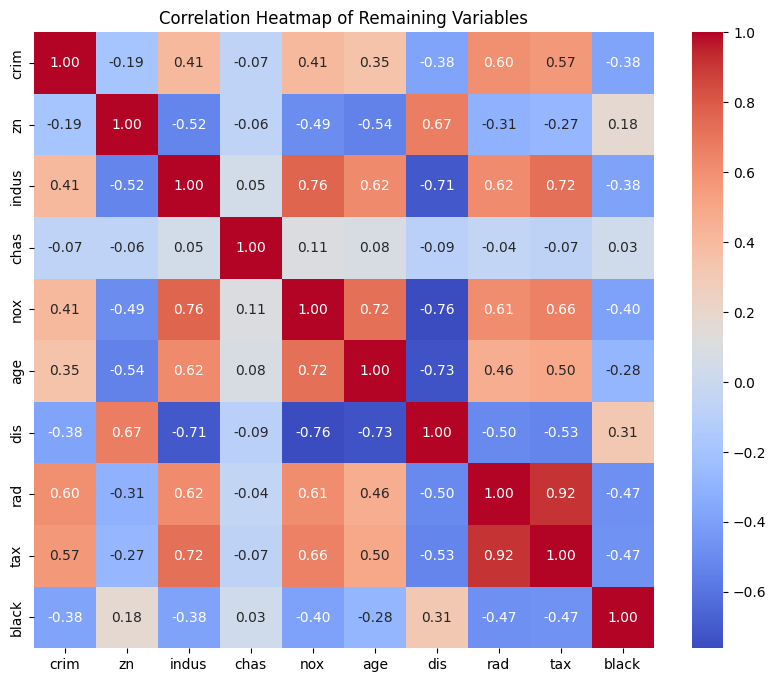

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Remaining Variables')
plt.show()

In [ ]:
# not really, I cannot find any variables with correlation over 76%

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation.

In [ ]:
# Your code here

In [ ]:
housing_price_stats = data['medv'].describe()
housing_price_stats

count    392.000000
mean      21.464796
std        7.499458
min        5.000000
25%       16.775000
50%       21.200000
75%       24.625000
max       48.300000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score.

In [ ]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between
        true and predicted values based on the metric chosen. """
    # Your code here:
    score = r2_score(y_true, y_predict)
    return score

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test.

In [ ]:
# Your code here
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (as always X--> features and y--> target variable)
X = data.drop('medv', axis=1)  # Features
y = data['medv']  # Target variable

# removing bias - shuffling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

# To remember: 'test_size' tells me the proportion of the dataset to include in the test split.
# 'random_state' ensures reproducibility, we always choose 0


----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively.

In [ ]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor

In [ ]:
max_depth_values = [2, 4, 6, 8, 10]
models = {} # we use a dictionary to store the models

In [ ]:
for depth in max_depth_values:
    model = RandomForestRegressor(max_depth=depth, random_state=0)
    model.fit(X_train, y_train)
    models[f"max_depth_{depth}"] = model

Now, plot the score for each tree on the training set and on the testing set.

In [ ]:
# Produce a plot with the score for the testing and training for the different max depths

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Lists to store the scores for each max_depth
train_scores = []
test_scores = []

In [ ]:
# r-squar for each model
for depth in max_depth_values:
    # here i use the dict
    model = models[f"max_depth_{depth}"]
    # r-square for training set
    train_score = model.score(X_train, y_train)
    train_scores.append(train_score)
    # r-square for testing set
    test_score = model.score(X_test, y_test)
    test_scores.append(test_score)

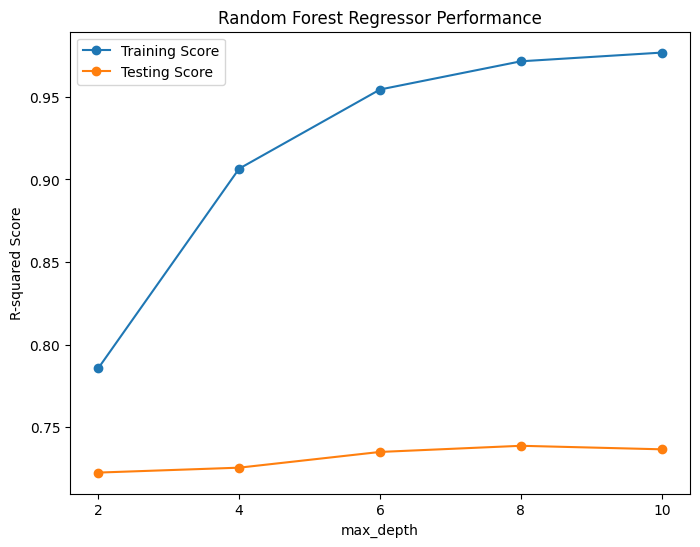

In [ ]:
# plot
plt.figure(figsize=(8, 6))
plt.plot(max_depth_values, train_scores, marker='o', label='Training Score')
plt.plot(max_depth_values, test_scores, marker='o', label='Testing Score')
plt.title('Random Forest Regressor Performance')
plt.xlabel('max_depth')
plt.ylabel('R-squared Score')
plt.xticks(max_depth_values)
plt.legend()
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here
# 1. the higher the max_depth, the higher the training score --> deeper trees can capture more intricate patterns in the training data --> better performance
# 2. we see a big ogap between training and testing scores as max_depth increases --> could be overfitting --> issue

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [ ]:
# Your response here
# 1. the model typically suffers from high bias and LOW variance
# 2. when the model is trained with a max_depth of 10, the model gets very complex and can capture intricate patterns. nevertheless, this may bring overfitting to the table.

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# Your response here

In [ ]:
from sklearn.model_selection import cross_val_score
# List of max_depth values to try
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# store cross-validation scores for each max_depth
cv_scores = {}

# Perform cross-validation for each max_depth
for depth in max_depth_values:
    model = RandomForestRegressor(max_depth=depth, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    cv_scores[depth] = scores.mean()

# what is the max_depth with the highest cross-validation score??
optimal_depth = max(cv_scores, key=cv_scores.get)
optimal_depth

8

In [ ]:
# actually we can see it in the plot as well, where the optimal depth shows the end of the increase and the start of the flow (plateauning)

In [ ]:
# Training the model
optimal_model = RandomForestRegressor(max_depth=optimal_depth, random_state=42)
optimal_model.fit(X_train, y_train)

# Evaluating the model
test_score = optimal_model.score(X_test, y_test)
test_score

0.7525527484782383

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
#How relevant today is data that was collected from 1978?
# limited as demographics, economic factors and trends change over time

#Are the features present in the data sufficient to describe a home?
# i believe we are missing other critical

#Is the model robust enough to make consistent predictions?
# it has been too long since 1978 to consider this model is robust

#Would data collected in an urban city like Boston be applicable in a rural city?
# unlikely as rural and urban areas have different housing dynamics, prices, trends...
